In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
# Getting Dependencies
import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
#from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
#from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [3]:
!ls

animal10			 maleria_mobilenet_weights.h5
archive.zip			 model.h5
bestanimal10predictor.hdf5	 my_model_weights.h5
cats_and_dogs_filtered		 __pycache__
cell_images			 raw-img
intelimage_mobilenet_weights.h5  raw-intel-images
intel_images.zip		 translate.py
Maleria_cell_images.zip


# Data Preprocessing

In [ ]:
#!unzip Maleria_cell_images.zip

In [7]:
!ls

animal10		    intelimage_mobilenet_weights.h5  __pycache__
archive.zip		    intel_images.zip		     raw-img
bestanimal10predictor.hdf5  Maleria_cell_images.zip	     raw-intel-images
cats_and_dogs_filtered	    model.h5			     translate.py
cell_images		    my_model_weights.h5


In [8]:
!ls cell_images

cell_images  Parasitized  Uninfected


In [26]:
glob.glob('cell_images/*')

['cell_images/Parasitized',
 'cell_images/Uninfected',
 'cell_images/cell_images']

In [27]:
if os.path.isdir('cell_images/cell_images'):
  shutil.rmtree('cell_images/cell_images')

In [28]:
glob.glob('cell_images/*')

['cell_images/Parasitized', 'cell_images/Uninfected']

In [30]:
# Number of files in each sub-category
for dir in os.listdir('cell_images'):
  print(dir, len(os.listdir('cell_images/'+dir)) )

Parasitized 13780
Uninfected 13780


# Splitting dataset into train and test

In [62]:
if not os.path.isdir('cell_images/train'):
  os.mkdir('cell_images/train/')
if not os.path.isdir('cell_images/test'):
  os.mkdir('cell_images/test/')

for dir in glob.glob('cell_images/*ed'):
  if not os.path.isdir('cell_images/train/'+dir[12:]):
    os.makedirs('cell_images/train/'+dir[12:])
  if not os.path.isdir('cell_images/test/'+dir[12:]):
    os.makedirs('cell_images/test/'+dir[12:])

In [68]:
!ls cell_images/train

Parasitized  Uninfected


In [59]:
for dir in glob.glob('cell_images/*ed'):
  print(dir[12:])

Parasitized
Uninfected


In [65]:
#shutil.rmtree('cell_images/train/cell_images')
#shutil.rmtree('cell_images/test/cell_images')

In [71]:
for file in os.listdir('cell_images/Parasitized')[0:10000]:
  shutil.copyfile('cell_images/Parasitized/'+file, 'cell_images/train/Parasitized/'+file)
for file in os.listdir('cell_images/Parasitized')[10000:]:
  shutil.copyfile('cell_images/Parasitized/'+file, 'cell_images/test/Parasitized/'+file)

for file in os.listdir('cell_images/Uninfected')[0:10000]:
  shutil.copyfile('cell_images/Uninfected/'+file, 'cell_images/train/Uninfected/'+file)
for file in os.listdir('cell_images/Uninfected')[10000:]:
  shutil.copyfile('cell_images/Uninfected/'+file, 'cell_images/test/Uninfected/'+file)

In [4]:
# Directory paths
base_path = "/content/drive/MyDrive/Colab Notebooks/Data/cell_images/"
train_path = os.path.join(base_path, "train/")
test_path = os.path.join(base_path, "test/")
train_path

'/content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/'

-----------------Images from Train Folder---------------


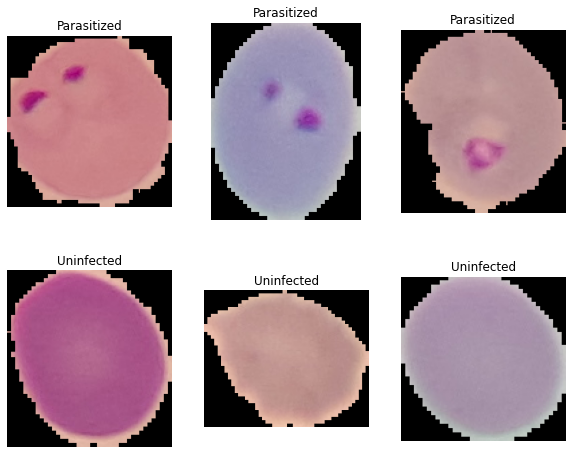

In [10]:
# Checking some random files from train folder
import random
import matplotlib.image as mpimg

print("-----------------Images from Train Folder---------------")
print("=========================================================")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
k=0
for dir in os.listdir(train_path):
  for i in range(3):
    random_image = random.sample(os.listdir(train_path+dir),1)
    img = mpimg.imread(train_path+dir+'/'+random_image[0])
    ax[k,i].imshow(img)
    ax[k,i].set_title(dir)
    ax[k,i].axis('off')
  k+=1

------Images from Test Folder-----------


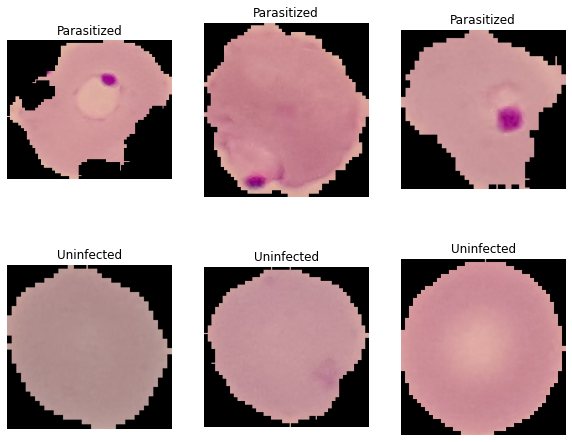

In [11]:
# Checking some random files from test folder

print("------Images from Test Folder-----------")
print("=============================================")
k=0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8))

for dir in os.listdir(test_path):
  for i in range(3):
    random_test_image = random.sample(os.listdir(test_path+dir),1)
    img = mpimg.imread(test_path+dir+'/'+random_test_image[0])
    ax[k,i].imshow(img)
    ax[k,i].set_title(dir)
    ax[k,i].axis('off')
  k+=1

In [5]:
print("Number of images in train directory:")
print("---------------------------------------")
for dir in os.listdir(train_path):
  print(dir,len(os.listdir(train_path+dir)))

print("Number of images in test directory:")
print("---------------------------------------")
for dir in os.listdir(test_path):
  print(dir,len(os.listdir(test_path+dir)))

Number of images in train directory:
---------------------------------------
Parasitized 10000
Uninfected 10000
Number of images in test directory:
---------------------------------------
Parasitized 3780
Uninfected 3780


In [101]:
#shutil.rmtree('cell_images/Parasitized')
#shutil.rmtree('cell_images/Uninfected')

In [13]:
!ls cell_images/

test  train


In [14]:
print("train_path: ", train_path)
print("test path: ",test_path)

train_path:  /content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/
test path:  /content/drive/MyDrive/Colab Notebooks/Data/cell_images/test/


# Image Augmentation

In [6]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(128,128),
                                                    class_mode='sparse',
                                                    batch_size=50)

val_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size=(128,128),
                                                 class_mode='sparse',
                                                 batch_size=50)

Found 20000 images belonging to 2 classes.
Found 7558 images belonging to 2 classes.


# Build Model

In [7]:
# Creating an instance of pre-trained model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

base_model = MobileNetV2(input_shape=(128,128,3),
                         weights='imagenet',
                         include_top=False)

In [ ]:
base_model.summary()

In [9]:
# Making layers of pre-trained model non-trainable

for layer in base_model.layers:
  layer.trainable=False

In [10]:
folders = glob.glob(train_path+'*')
folders, len(folders)

(['/content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/Parasitized',
  '/content/drive/MyDrive/Colab Notebooks/Data/cell_images/train/Uninfected'],
 2)

In [15]:
from tensorflow.keras.layers import GlobalAvgPool2D
# Creating the complete model

model = Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,571,778
Trainable params: 1,313,794
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.metrics.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
# Early Stopping
import keras

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

In [18]:
hist = model.fit(train_generator,
                 steps_per_epoch=200,
                 epochs=20,
                 validation_data=val_generator,
                 validation_steps=58,
                 verbose=2,
                 callbacks=[callback])

Epoch 1/20
200/200 - 149s - loss: 0.3542 - accuracy: 0.8832 - val_loss: 0.2188 - val_accuracy: 0.9055 - 149s/epoch - 747ms/step
Epoch 2/20
200/200 - 125s - loss: 0.1963 - accuracy: 0.9253 - val_loss: 0.1813 - val_accuracy: 0.9355 - 125s/epoch - 624ms/step
Epoch 3/20
200/200 - 119s - loss: 0.1711 - accuracy: 0.9352 - val_loss: 0.1899 - val_accuracy: 0.9283 - 119s/epoch - 597ms/step
Epoch 4/20
200/200 - 120s - loss: 0.1566 - accuracy: 0.9418 - val_loss: 0.1899 - val_accuracy: 0.9241 - 120s/epoch - 601ms/step
Epoch 5/20
200/200 - 120s - loss: 0.1600 - accuracy: 0.9427 - val_loss: 0.1824 - val_accuracy: 0.9286 - 120s/epoch - 598ms/step
Epoch 6/20
200/200 - 120s - loss: 0.1576 - accuracy: 0.9407 - val_loss: 0.1807 - val_accuracy: 0.9272 - 120s/epoch - 599ms/step
Epoch 7/20
200/200 - 118s - loss: 0.1478 - accuracy: 0.9473 - val_loss: 0.1857 - val_accuracy: 0.9310 - 118s/epoch - 589ms/step
Epoch 8/20
200/200 - 120s - loss: 0.1414 - accuracy: 0.9470 - val_loss: 0.2513 - val_accuracy: 0.8897 - 

In [22]:
import h5py
h5py.run_tests()

1

In [23]:
from tensorflow.keras.models import save_model
model.save_weights('maleria_mobilenet_weights.h5')